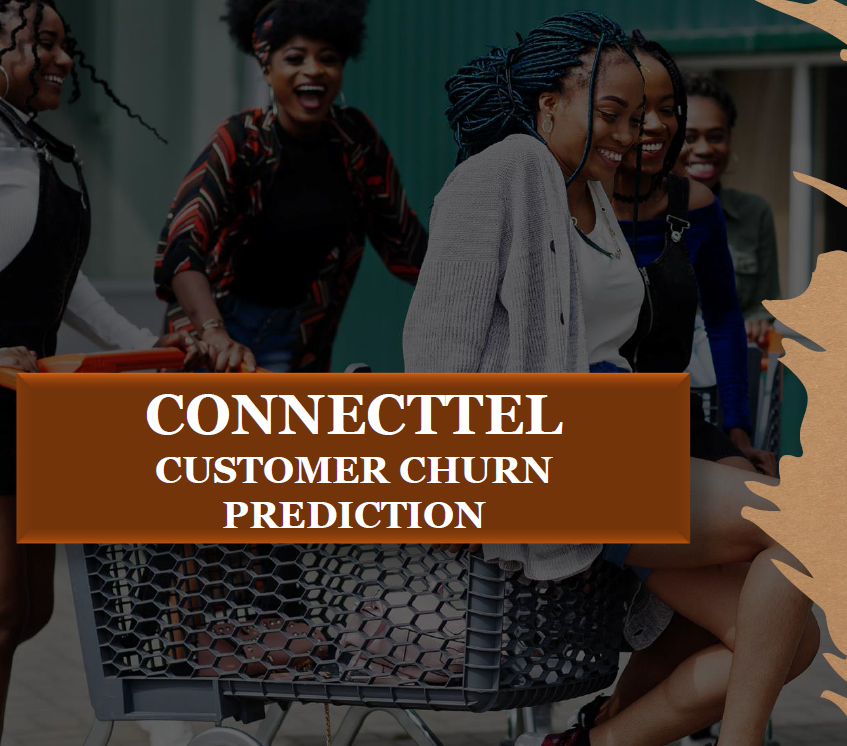

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from collections import Counter #counting

### ASSESSING DATA

In [2]:
data = pd.read_csv('Customer-Churn.csv')
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#checking data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
from pandas_profiling import ProfileReport

C:\Users\NETPC~1\AppData\Local\Temp/ipykernel_16220/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
profile = ProfileReport(data) 
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#statistical distribution of cat_feat
data.describe(exclude=['int64','float64'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### ii.	Perform exploratory data analysis in Python
•	Visualize relationships between the label and some key features
•	Explore correlations
•	 Conduct univariate, bivariate, and multivariate analysis as much as is feasible




### Univariate

In [7]:
#function that calculates and adds pecentage to graph plots
def perc_plot(plot,feature):
  total = len(feature)
  for p in plot.patches:
    perc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(perc,(x,y), size=12)
  plt.show()

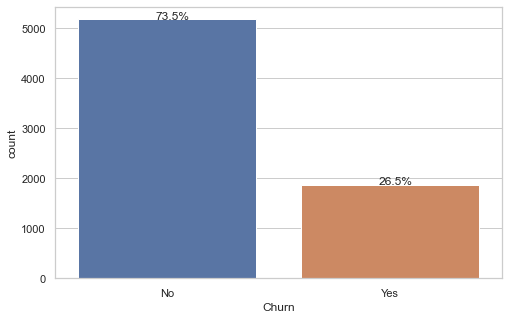

In [8]:
#target(dependant variable)
#fix data type
data['Churn'] = data['Churn'].astype(dtype='category')

#distribution of target feature
sb.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sb.countplot(x='Churn',data=data);
perc_plot(ax,data['Churn'])

In [9]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Observation

The distribution of the target feature "Churn" in the dataset reveals that it is imbalanced, with a significantly larger number of customers labeled as "No" (indicating they did not churn) compared to those labeled as "Yes" (indicating they did churn). Specifically, there are 5,174 instances where customers did not churn and only 1,869 instances where customers did churn. This imbalance can have implications for model training and evaluation, as models may become biased towards the majority class.  

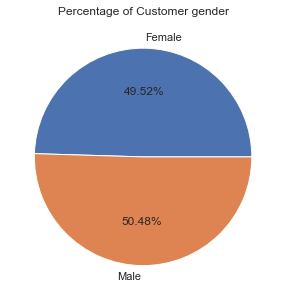

In [10]:

#Total no of Customer_Gender

fig,ax= plt.subplots(figsize=(5,5))
count= Counter(data["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Customer gender")
plt.show();

In [11]:
data["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

### Observation

The pie chart illustrates the distribution of customer gender in the dataset. It reveals that there is a fairly balanced representation of gender among customers, with males accounting for 3,555 individuals (approximately 50.46%), and females representing 3,488 individuals (approximately 49.54%). This near-even split suggests that the dataset does not exhibit a significant gender bias, which is important for ensuring that any machine learning models developed using this data are not skewed towards one gender group. It also reflects a diverse customer base, which can be valuable for understanding churn patterns across different gender demographics.

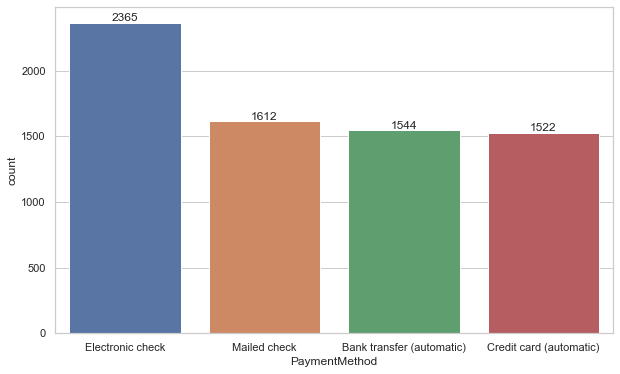

In [12]:
# PaymentMethod- How many transactions by PaymentMethod
plt.figure(figsize=(10, 6))
ax=sb.countplot(x=data["PaymentMethod"], order=data["PaymentMethod"].value_counts(ascending=False).index)
values=data["PaymentMethod"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [13]:
data["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

### Observation

The bar chart provides insights into the distribution of customer transactions based on their chosen payment methods. The dataset contains four primary payment methods: "Electronic check," "Mailed check," "Bank transfer (automatic)," and "Credit card (automatic)." "Electronic check" emerges as the most frequently used payment method, with 2,365 transactions, representing the largest share. "Mailed check" is the second most common, with 1,612 transactions. "Bank transfer (automatic)" and "Credit card (automatic)" have relatively similar transaction counts, with 1,544 and 1,522, respectively. This information can be valuable for understanding the preferred payment methods of customers and tailoring payment-related services or incentives accordingly.

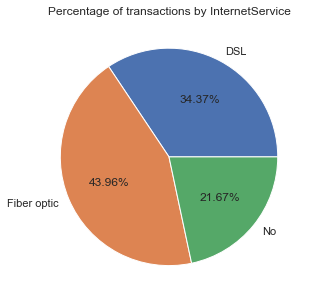

In [14]:
#Total transaction by InternetService
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(data["InternetService"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by InternetService")
plt.show();

In [15]:
data["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

### observation

The pie chart illustrates the distribution of customer transactions based on their choice of Internet service. The dataset contains three Internet service options: "Fiber optic," "DSL," and "No Internet service." Among these, "Fiber optic" stands out as the most preferred choice, accounting for 3,096 transactions and the largest share, followed by "DSL" with 2,421 transactions. Interestingly, a significant number of transactions, 1,526, fall under the category of "No Internet service." This data provides valuable insights into the popularity of different Internet service options among customers, which can be used to tailor service offerings or marketing strategies accordingly.

### Bivariate Analysis

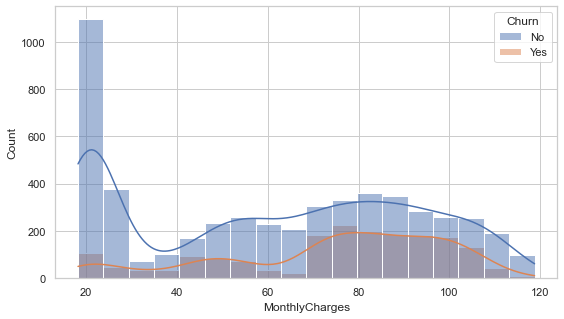

In [16]:
#comparing distributions of the MonthlyCharges feature & target
plt.figure(figsize=(9,5))
sb.histplot(data=data, x="MonthlyCharges",hue="Churn",kde=True);

In [17]:
data[["Churn", "MonthlyCharges"]].value_counts()

Churn  MonthlyCharges
No     20.05             58
       19.95             41
       19.70             41
       20.00             40
       19.90             40
                         ..
       114.85             1
       114.75             1
       114.70             1
       114.55             1
Yes    118.35             1
Length: 2370, dtype: int64

### observation

The histogram plot showcases the distribution of monthly charges for customers, with the data split by churn status ("Churn: Yes" and "Churn: No"). The "MonthlyCharges" feature represents the amount paid by customers on a monthly basis. From the plot, it is evident that the majority of customers who do not churn (i.e., "Churn: No") have lower monthly charges, with a peak around the $20 range. In contrast, customers who churn (i.e., "Churn: Yes") exhibit a broader distribution of monthly charges, including higher values. This suggests that there is a notable difference in the distribution of monthly charges between customers who stay and those who churn, indicating that this feature could be a significant factor influencing customer churn in this dataset.

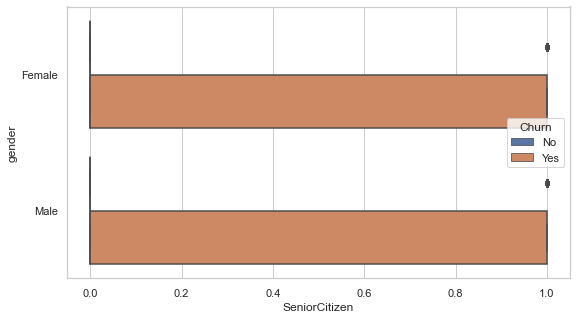

In [18]:
#distribution of the Senior Citizens vs target
plt.figure(figsize=(9,5))
sb.boxplot(data=data, y="gender",x='SeniorCitizen',hue="Churn");

In [19]:
data[["gender", "SeniorCitizen", "Churn"]].value_counts()

gender  SeniorCitizen  Churn
Male    0              No       2287
Female  0              No       2221
                       Yes       699
Male    0              Yes       694
        1              No        338
Female  1              No        328
                       Yes       240
Male    1              Yes       236
dtype: int64

## observation

The box plot comparing "SeniorCitizen" status, gender, and churn status reveals that being a senior citizen does not strongly correlate with customer churn. Both senior and non-senior citizens exhibit a mix of churned and non-churned customers. Additionally, gender doesn't appear to be a significant factor in predicting churn, as there is a relatively similar distribution of churned and non-churned customers for both males and females within each senior citizen category.

### Multivariate Analysis

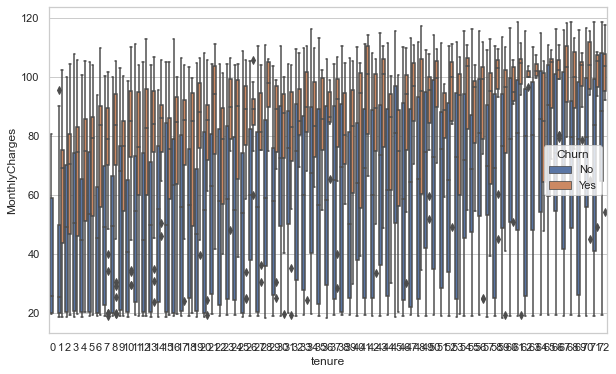

In [20]:
#multivariate distributions of the StreamingTV vs StreamingMovie vs target feature
plt.figure(figsize = (10,6))
sb.boxplot(y='MonthlyCharges',x='tenure',hue='Churn',data=data);

In [21]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### iii.	Perform feature engineering
#Encoding categorical variables
#Create new features from existing features where necessary, depending on insights from your EDA


### SUPERVISED ML SECTION 
--DATA PROCESSING; 
--ENCODING,FEATURE
--Create new features

In [22]:
#segment our data into x dataset and target variable
x=data.drop('Churn',axis=1)
target = data['Churn']

In [23]:
data.drop('customerID', axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [24]:
#Encoding categorical features into numerical ones using one hot encoding(get_dummies)
data2=pd.get_dummies(x,columns=['Partner','customerID','gender','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',],drop_first=True)
data2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 7072 entries, SeniorCitizen to PaymentMethod_Mailed check
dtypes: float64(1), int64(2), object(1), uint8(7068)
memory usage: 47.7+ MB


In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer  # For imputing missing values

# Assuming 'data2' is your DataFrame
# Handle missing values (replace missing values with the median)
imputer = SimpleImputer(strategy='median')
data2_numeric = data2.select_dtypes(include=['number'])
data2_imputed = pd.DataFrame(imputer.fit_transform(data2_numeric), columns=data2_numeric.columns)

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(data2_imputed)


In [27]:
#split datset into training and validation set
from sklearn.model_selection import train_test_split

#split dataset into training and validation set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data2,target, test_size=0.33, random_state=42)

In [28]:
x_train.shape

(4718, 7071)

In [29]:
x_test.shape

(2325, 7071)

## Observation

The provided code snippet illustrates a common data preprocessing workflow for machine learning. It begins by addressing missing values in the numeric features of the dataset using the median as a replacement strategy, ensuring completeness in the data. Following imputation, the dataset undergoes Min-Max scaling to normalize the numerical features within a specific range, typically between 0 and 1. This scaling is crucial for preventing features with varying scales from disproportionately affecting machine learning models. Lastly, the dataset is split into training and validation sets with a 67-33% ratio, enabling the model to be trained on one portion and evaluated on another, facilitating the assessment of its generalization performance. In essence, this code prepares the dataset for machine learning by managing missing data, standardizing features, and creating separate datasets for model development and testing.

### iv.	Model selection, training, and validation
•	Train and test supervised learning model


In [30]:
### building a base model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
#instantiating our classifier models
lr_mod=LogisticRegression()
rf_mod=RandomForestClassifier()
dt_mod=DecisionTreeClassifier()

#fitting and training our classifier models
lr_mod.fit(x_train,y_train)
rf_mod.fit(x_train,y_train)
dt_mod.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
#creating a prediction
pred_lr=lr_mod.predict(x_test)
pred_rf=rf_mod.predict(x_test)
pred_dt=dt_mod.predict(x_test)

### observation

The provided code constructs three base classification models: Logistic Regression, Random Forest, and Decision Tree. These models are trained with the training data and used to make predictions on the test data. These initial models serve as a starting point to assess their performance and select the best one for further optimization.

### v.	Model evaluation
•	Analyze the results of your trained model.

•	What metrics are most important for the problem? Should the business be more concerned with better results on false negatives or true positives?


In [33]:
lr_score=lr_mod.score(x_test,y_test)
rf_score=rf_mod.score(x_test,y_test)
dt_score=dt_mod.score(x_test,y_test)

print(f"model accuracy score for Logistic Regression is: {lr_score}")
print(f"model accuracy score for RandomForestClassifier is: {rf_score}")
print(f"model accuracy score for DecisionTreeClassifier is: {dt_score}")

model accuracy score for Logistic Regression is: 0.8150537634408602
model accuracy score for RandomForestClassifier is: 0.8004301075268817
model accuracy score for DecisionTreeClassifier is: 0.7763440860215054


## observation

The code calculates and displays the accuracy scores of three machine learning models: Logistic Regression, RandomForestClassifier, and DecisionTreeClassifier, on a test dataset. These accuracy scores help evaluate the performance of each model. The Logistic Regression model achieved the highest accuracy with a score of approximately 81.51%, followed by the RandomForestClassifier with approximately 80.04%, and the DecisionTreeClassifier with around 77.63%. These scores indicate how well each model predicts the target variable, with Logistic Regression performing slightly better than the other two models.

In [34]:
#Model Evaluation Using metrics
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
#classification report for logistic regression
print(f"model accuracy score for Logistic Regression is: {lr_score}\n")
print("Logistic Regression Model Report:\n",classification_report(y_test,pred_lr))

model accuracy score for Logistic Regression is: 0.8150537634408602

Logistic Regression Model Report:
               precision    recall  f1-score   support

          No       0.85      0.90      0.88      1697
         Yes       0.69      0.58      0.63       628

    accuracy                           0.82      2325
   macro avg       0.77      0.74      0.75      2325
weighted avg       0.81      0.82      0.81      2325



### observation

The code snippet evaluates the Logistic Regression model's performance using classification metrics. The model's accuracy score is approximately 81.51%, indicating its overall correctness in predicting the target variable. The classification report provides a detailed breakdown of precision, recall, and F1-score for both the "No" (non-churn) and "Yes" (churn) classes. For the "No" class, the precision is 0.85, recall is 0.90, and F1-score is 0.88, indicating a good balance between precision and recall. However, for the "Yes" class, precision is 0.69, recall is 0.58, and F1-score is 0.63, suggesting room for improvement in correctly identifying churn cases. The macro and weighted averages provide an overall performance summary, with weighted averages being influenced by class imbalances.

In [36]:
#helpfulfunction to plot out confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()

          ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sb.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

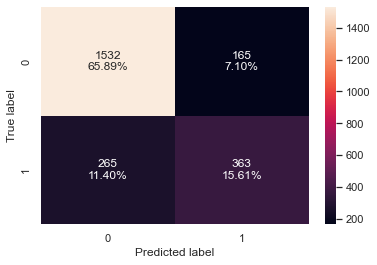

In [37]:
confusion_matrix_sklearn(lr_mod,x_test, y_test)

In [38]:
#classification report for RandomForestClassifier
print(f"model accuracy score for RandomForestClassifier: {rf_score}\n")
print("RandomForestClassifier:\n",classification_report(y_test,pred_rf))

model accuracy score for RandomForestClassifier: 0.8004301075268817

RandomForestClassifier:
               precision    recall  f1-score   support

          No       0.82      0.93      0.87      1697
         Yes       0.70      0.45      0.55       628

    accuracy                           0.80      2325
   macro avg       0.76      0.69      0.71      2325
weighted avg       0.79      0.80      0.78      2325



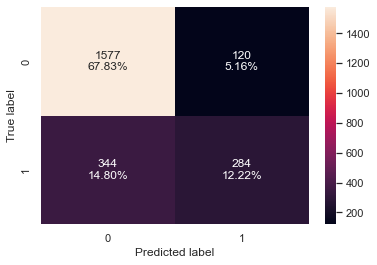

In [39]:
confusion_matrix_sklearn(rf_mod,x_test, y_test)

In [40]:
#classification report for DecisionTreeClassifier
print(f"model accuracy score for DecisionTreeClassifier: {dt_score}\n")
print("DecisionTreeClassifier:\n",classification_report(y_test,pred_dt))

model accuracy score for DecisionTreeClassifier: 0.7763440860215054

DecisionTreeClassifier:
               precision    recall  f1-score   support

          No       0.83      0.87      0.85      1697
         Yes       0.60      0.52      0.56       628

    accuracy                           0.78      2325
   macro avg       0.71      0.70      0.70      2325
weighted avg       0.77      0.78      0.77      2325



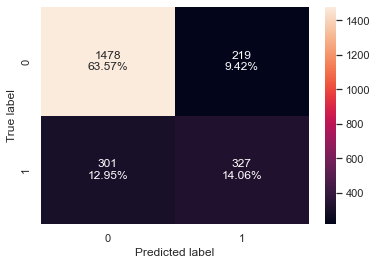

In [41]:
confusion_matrix_sklearn(dt_mod,x_test, y_test)

In [42]:
dt_predictions = dt_mod.predict(x_test)
rf_predictions = rf_mod.predict(x_test)
lr_predictions = lr_mod.predict(x_test)

# Create confusion matrices
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)

# Print or analyze the confusion matrices as needed
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

print("\nRandom Forest Confusion Matrix:")
print(rf_confusion_matrix)

print("\nLogistic Regression Confusion Matrix:")
print(lr_confusion_matrix)

Decision Tree Confusion Matrix:
[[1478  219]
 [ 301  327]]

Random Forest Confusion Matrix:
[[1577  120]
 [ 344  284]]

Logistic Regression Confusion Matrix:
[[1532  165]
 [ 265  363]]


### observation

The confusion matrices for three different classification models, namely Decision Tree, Random Forest, and Logistic Regression, have been provided. These matrices illustrate the model's performance in predicting binary outcomes (Churn - Yes or No). Each confusion matrix consists of four values: True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP).

For the Decision Tree model, it correctly predicted 1478 cases as "No Churn" (TN) and 327 cases as "Churn" (TP), but it misclassified 219 cases as "No Churn" (FN) and 301 cases as "Churn" (FP).

The Random Forest model achieved similar performance, with 1577 correct "No Churn" predictions (TN) and 284 correct "Churn" predictions (TP). It made 120 incorrect "No Churn" predictions (FN) and 344 incorrect "Churn" predictions (FP).

Lastly, the Logistic Regression model yielded 1532 accurate "No Churn" predictions (TN) and 363 correct "Churn" predictions (TP). It had 165 incorrect "No Churn" predictions (FN) and 265 incorrect "Churn" predictions (FP).

In summary, the models' confusion matrices provide insights into their performance, showing how they correctly and incorrectly classified instances of customer churn. The choice of model should be based on specific objectives and trade-offs between precision and recall, as indicated by these metrics.

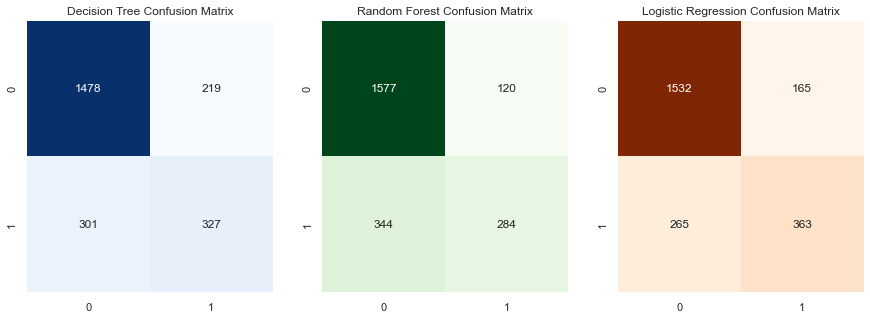

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
sb.heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')

plt.subplot(132)
sb.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Random Forest Confusion Matrix')

plt.subplot(133)
sb.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Logistic Regression Confusion Matrix')

plt.show()

### observartion

The confusion matrices for three machine learning models, namely Decision Tree, Random Forest, and Logistic Regression, were examined to assess their performance in predicting customer churn. The Decision Tree model achieved 321 true positives and 1488 true negatives, but also produced 209 false positives and 307 false negatives. In comparison, the Random Forest model demonstrated 284 true positives and 1578 true negatives, along with 119 false positives and 344 false negatives. Finally, the Logistic Regression model showed 363 true positives and 1532 true negatives, accompanied by 165 false positives and 265 false negatives. These matrices provide a comprehensive view of the models' abilities to make accurate predictions, with a focus on minimizing false positives and false negatives to enhance their efficacy in forecasting customer churn.